In [20]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sqlite3

In [21]:
def getData():
    conn = sqlite3.connect('data.db', check_same_thread=False)
    c = conn.cursor()

    c.execute("SELECT pnl, pnl_percent from trades where timefram='5m'")
    data = c.fetchall()
    return data

profits = getData()
flow = [0]

[0, 0.6672667501565388, -0.08748721965330242, -0.12352561692748909, -0.12369006708017867, 0.25146226650567644]


Text(0, 0.5, 'Amount ($)')

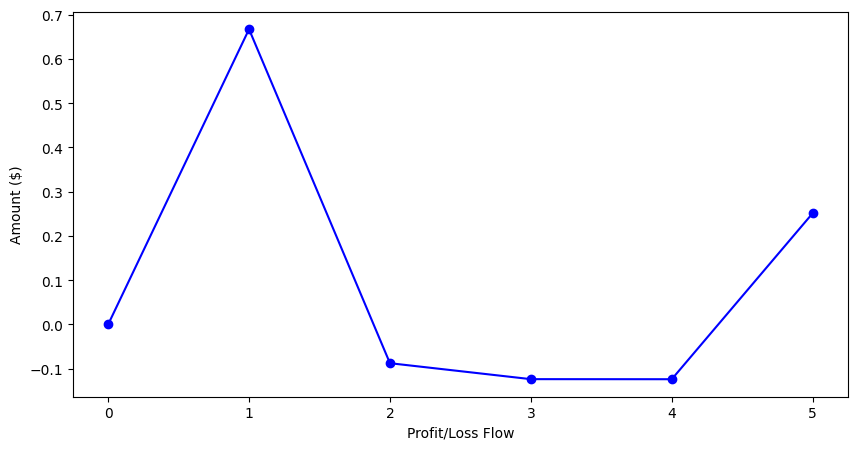

In [22]:
for i in profits:
    flow.append(i[0]+flow[-1])

print(flow)
plt.figure(figsize=(10, 5))
plt.plot(flow, marker='o', color='b')
plt.xlabel("Profit/Loss Flow")
plt.ylabel("Amount ($)")